# Handling topographic data

#objectives
- Explain what a library is and what libraries are used for
- Load a Python library and use the tools it contains
- Read data from a file into a program
- Assign values to variables
- Extract values and slices of data
- Perform operations on arrays of data
- Display simple graphs

The best way to learn how to program is to do something useful and interesting, so this introduction to Python is built around a task that is of particular interest to the CSDMS community: building numerical models.

Python is an increasingly popular programming language. It's good as a first language because it is concise and easy to read, but it is also a great language for more experienced programmers to learn because it is powerful and versitile. While a lot of basic functionality is built directly into a language like Python, a massive collection of tools for every imaginable task exist in libraries (also called packages).

The most common libraries for scientific programming come bundled with the Anaconda distribution of Python that we are using in this workshop. Check out the Python Package Index to see what else is available: https://pypi.python.org/pypi


## Loading data

The goal of this Python workshop is to build a two-dimensional diffusion model of landscape evolution. The first step is to load an elevation dataset (the initial conditions for our model) and figure out how to manipulate it.

Take a look at the contents of the file <code>data/topo.asc</code>. For simplicity, we are not using a *real* ASC file for this tutorial. We've removed the header and the projection file to leave only the rectangular array of elevation values and we replaced the commas between values with spaces.

In order to load the elevation data, we need to import a library called **Numpy**. You use this library to do fancy things with numbers (ie. math), especially when we are handling matrices or arrays. We can load Numpy with the command <code>**import**</code>:

In [2]:
import numpy

Within the Jupyter (iPython) notebook, pressing Shift+Enter runs the commands in the selected cell. Importing a library should not produce visible output.

Importing a library is like pulling a toolbox out of a storage locker and placing it on your workbench. Python has a set of built-in functions that are always available (the everyday tools on your workbench). Libraries provide additional functionality to Python (the specialized tools in the toolbox that you only sometimes need).

Once we’ve loaded the library, we can use a function in this library to read the data file:

In [6]:
numpy.loadtxt('data/topo.asc')

array([[ 3198.8391,  3198.123 ,  3197.1584, ...,  2583.3293,  2585.4368,
         2589.1079],
       [ 3198.3306,  3197.5242,  3196.4102, ...,  2582.6992,  2584.9167,
         2587.801 ],
       [ 3197.9968,  3196.9197,  3195.7188, ...,  2581.8328,  2583.8159,
         2586.0325],
       ..., 
       [ 3325.1509,  3334.7822,  3343.3154, ...,  2780.8191,  2769.3235,
         2762.373 ],
       [ 3325.0823,  3335.0308,  3345.4963, ...,  2775.3345,  2765.7131,
         2759.6555],
       [ 3326.6824,  3336.5305,  3348.1343, ...,  2769.7661,  2762.5242,
         2756.6877]])

The expression numpy.loadtxt(...) tells Python to run the function <code>loadtxt</code> from the <code>numpy</code> library. This **dotted notation**, with the syntax *thing.component*, is used everywhere in Python to refer to parts of things.

The function call <code>numpy.loadtxt</code> has one **parameter**: the name of the file we want to read. The filename is a character string (or simply **string**) so it is in quotes.

Because we haven’t told iPython where to put the output of <code>numpy.loadtxt</code>, the notebook just displays it on the screen. That output is the data we just loaded. By default, only a few rows and columns are shown (with <code>...</code> to omit elements when displaying big arrays).

Our call to <code>numpy.loadtxt</code> read the file but didn’t save the values. In order to save the data and be able to access it later, we need to **assign** the values to a **variable**. 

A variable name is just a label that refers to an object in the memory. We can assign a variable name to an object using =. Python’s variables must begin with a letter and are case sensitive.

Let’s re-run <code>numpy.loadtxt</code> and assign the output to a variable name:

In [7]:
topo = numpy.loadtxt('data/topo.asc')

This command doesn’t produce any visible output. If we want to see the data, we can print the variable’s value with the command <code>print</code>:

In [8]:
print topo

[[ 3198.8391  3198.123   3197.1584 ...,  2583.3293  2585.4368  2589.1079]
 [ 3198.3306  3197.5242  3196.4102 ...,  2582.6992  2584.9167  2587.801 ]
 [ 3197.9968  3196.9197  3195.7188 ...,  2581.8328  2583.8159  2586.0325]
 ..., 
 [ 3325.1509  3334.7822  3343.3154 ...,  2780.8191  2769.3235  2762.373 ]
 [ 3325.0823  3335.0308  3345.4963 ...,  2775.3345  2765.7131  2759.6555]
 [ 3326.6824  3336.5305  3348.1343 ...,  2769.7661  2762.5242  2756.6877]]


#test

Track how variable names and objects are connected after each statement in the following program. What are the values of the variables after running each line of code?

In [11]:
mass = 47.5
age = 122
mass = mass * 2.0
age = age - 20

#solution

| Line number 	| <code>mass</code> 	|      <code>age</code>      	|
|:-----------:	|:----:	|:-------------:	|
|      1      	| 47.5 	| doesn't exist 	|
|      2      	| 47.5 	|      122      	|
|      3      	| 95.0 	|      122      	|
|      4      	| 95.0 	|      102      	|

#test

What does the following program print?

Bonus: Who was Grace Hopper?

In [12]:
first, second = 'Grace', 'Hopper'
third, fourth = second, first
print third, fourth

Hopper Grace


#solution

In [13]:
print third, fourth

Hopper Grace


https://en.wikipedia.org/wiki/Grace_Hopper

#test

Why doesn't this work?

In [16]:
17 = n

SyntaxError: can't assign to literal (<ipython-input-16-e0d672332486>, line 1)

#solution

The assignment token, '=', should not be confused with the equals sign, in the mathematical sense. The assignment statement binds a name, on the left-hand side of the operator, to a value, on the right-hand side. When reading or writing code, say to yourself “n is assigned 17” or “n gets the value 17”. Don’t say “n equals 17”.

Also, variable names must start with a letter or an underscore so the number 17 could not be used as a variable name.

The correct way to assign the value 17 to the variable name <code>n</code> is this:

In [17]:
n = 17

Using its variable name, we can see that **type** of object the variable name <code>topo</code> is assigned to:


In [14]:
type(topo)

numpy.ndarray

The function <code>type</code> tells us that the variable name <code>topo</code> points to an N-dimensional array created by the Numpy library. We can also get the shape of the array:

In [15]:
print topo.shape

(500, 500)


The array has 500 rows and 500 columns. The file we imported contains elevation data (in meters, 2 meter x 2 meter cells) for an area along the Front Range of Colorado, just south of Boulder. The area that this array covers is 1 km x 1 km.

The object of type <code>numpy.ndarray</code> that the variable topo is assigned to contains the values of the array as well as some extra information about the array. These are the **members** or **attributes** of the object, and they describe the data in the same way an adjective describes a noun. The command <code>topo.shape</code> calls the shape attribute of the object <code>topo</code>, which contains its dimensions. We use the same dotted notation for the attributes of objects that we use to call functions inside libraries because they have the same part-and-whole relationship.

#callout
### len() and other built-in functions

The function <code>len()</code> returns the length of the longest axis of a sequence (a numpy array, a list, etc.). Because it is a built-in function, it is always available to the Python interpreter and doesn’t have to be imported. The function <code>type()</code> is another built-in function. You can read about them in the Python docs: https://docs.python.org/2/library/functions.html

#callout
## Accessing documentation

How did we know what functions Numpy has and how to use them? If you are working in a Jupyter Notebook there is an easy way to find out!

Type the name of a library or a variable name, add a period, and press tab (e.g. <code>numpy.</code> and then press tab). This will show a list of all functions and attributes that you can use with that object.

You can also add a question mark after a function name to see the documentation (e.g. <code>numpy.cumprod?</code>). You can also access the docs with the function <code>help()</code> (ex. <code>help(numpy.cumprod)</code>).

## Plotting
Rasters are just big two dimensional arrays of values. In the case of DEMs, those values are elevations. It’s very hard to get a good sense of what a landscape looks like by looking directly at a giant array of numbers. This information is better conveyed through plots and graphics.

Data visualization deserves an entire lecture (or course) of its own but we can explore a few features of Python’s **matplotlib** library here. While there is no “official” plotting library in Python, this package is the de facto standard.

We start by importing the **pyplot** module from the library matplotlib. Since we don't need *all* of the tools available in matplotlib, we use the dotted notation to specify the particular collection we want.

In [18]:
import matplotlib.pyplot

#callout
## Some iPython Magic

If you’re using an iPython / Jupyter notebook, you’ll want to execute the following command in order for the plots to appear in the notebook instead of a separate window:

In [20]:
%matplotlib inline

The <code>%</code> indicates that this is an iPython magic function - a function that is only valid within the notebook environment.

We can use the function **imshow** ("image show") within <code>matplotlib.pyplot</code> to display an array as a 2D image:

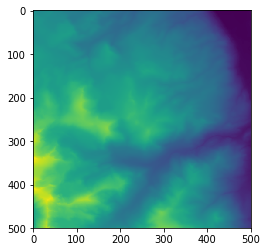

In [22]:
matplotlib.pyplot.imshow(topo)

## Indexing

We can access an individual value in an array by referencing its position. We specify the location of the value using an **integer index** in square brackets:

In [24]:
print 'elevation at the NE corner of topo:', topo[0,0], 'meters'

elevation at the NE corner of topo: 3198.8391 meters


In [26]:
print 'elevation at an arbitrary point in topo:', topo[137,65], 'meters'

elevation at an arbitrary point in topo: 3251.1179 meters


When accessing values in a two dimensional array, the indices are ordered <code>[row,column]</code>. The expression <code>topo[137, 65]</code> should not surprise you too much but <code>topo[0,0]</code> might.

Programming languages like Fortran and MATLAB start counting at 1 because that’s what (most) humans have done for thousands of years. Languages in the C family (including C++, Java, Perl, and Python) count from 0 because it's simpler for computers to do. So if we have an M×N array in Python, the indices go from 0 to M-1 on the first axis (rows) and 0 to N-1 on the second (columns). In MATLAB, the same array (or matrix) would have indices that go from 1 to M and 1 to N. **Zero-based indexing** takes a bit of getting used to. One way to remember the rule is that *the index is how many steps we have to take from the start to get to the item we want*.

Python also allows for negative indices to refer to the position of elements with respect to the end of each axis. An index of -1 refers to the last item in a sequence, -2 to the second to last, and so on. Since index <code>[0,0]</code> is the upper left corner of an array, index <code>[-1,-1]</code> is the lower right corner of the array:

In [27]:
print topo[-1,-1]

2756.6877


#callout
### In the corner

What may also surprise you is that Python displays the array with the element with index [0,0] in the upper left corner rather than the lower left. This is consistent with the way mathematicians draw matrices, but different from Cartesian coordinates. The indices are [row, column] instead of [column, row] for the same reason, which can be confusing when plotting data.

## Slicing

The statement <code>topo[0,0]</code> selects a single element in the array <code>topo</code>. We can also use integer indices to **slice** sections of the array with multiple values. For example, we can select a small square on the top left corner of the array like this:

In [28]:
print topo[0:5, 0:5]

[[ 3198.8391  3198.123   3197.1584  3196.2017  3193.8813]
 [ 3198.3306  3197.5242  3196.4102  3194.7559  3191.9763]
 [ 3197.9968  3196.9197  3195.7188  3193.3855  3190.5371]
 [ 3198.054   3196.7031  3194.9573  3192.4451  3189.5288]
 [ 3198.3289  3196.9111  3195.335   3192.7874  3190.0085]]


The slice <code>[0:5,0:5]</code> means “For both the rows and columns, start at index 0 and go along the axis up to, but not including, index 5”.

We don’t need to include the upper or lower bound of the slice if we want to go all the way to the edge. If we don’t include the lower bound, Python uses 0 by default. If we don’t include the upper bound, the slice runs to the end of the axis:

In [36]:
print topo[:5, 497:]

[[ 2583.3293  2585.4368  2589.1079]
 [ 2582.6992  2584.9167  2587.801 ]
 [ 2581.8328  2583.8159  2586.0325]
 [ 2580.9688  2582.8279  2584.7751]
 [ 2580.2957  2582.1313  2584.1919]]


If we don’t include either the lower or upper bound of a slice (i.e., if we just use the colon), the slice includes every value along that axis:

In [39]:
print topo[0:2,:].shape

(2, 500)


#test

Use indexing to answer the following questions. Check your answers against the visualization of the array:

- Is the NW corner of the region higher than the SW corner? What’s the elevation difference?
- What’s the elevation difference between the NE corner and the SE corner?
- What’s the elevation at the center of the region shown in the array? (Hint: You can use the function <code>len()</code>)

#solution

In [48]:
print 'NW corner:', topo[0,0], 'meters'
print 'SW corner:', topo[-1,0], 'meters'
print 'Difference between NW and SW corners:', topo[0,0] - topo[-1,0], 'meters'
print '-' * 60
print 'Difference between NE and SE corners:', topo[0,-1] - topo[-1,-1], 'meters'
print '-' * 60
print 'Elevation at the center:', topo[len(topo)/2, len(topo)/2], 'meters'

NW corner: 3198.8391 meters
SW corner: 3326.6824 meters
Difference between NW and SW corners: -127.8433 meters
------------------------------------------------------------
Difference between NE and SE corners: -167.5798 meters
------------------------------------------------------------
Elevation at the center: 3372.386 meters


#test

Indexing and slicing work the same way for any type of sequence, including Numpy arrays, lists, and strings:

In [50]:
element = 'oxygen'
print 'first three characters:', element[0:3]
print 'last three characters:', element[3:6]

first three characters: oxy
last three characters: gen


- What is the value of <code>element[:4]</code>? What about <code>element[4:]</code>? Or <code>element[:]</code>?

#solution

In [52]:
print 'element[:4]:', element[:4]
print 'element[4:]:', element[4:]
print 'element[:]:', element[:]

element[:4]: oxyg
element[4:]: en
element[:]: oxygen


- What is <code>element[-1]</code>? What is <code>element[-2]</code>?

#solution

In [53]:
print 'element[-1]:', element[-1]
print 'element[-2]:', element[-2]

element[-1]: n
element[-2]: e


- Given those answers, explain what <code>element[1:-1]</code> does.

Creates a substring from index 1 up to (but not including) the last value, effectively removing the first and last letters from ‘oxygen’.

#test

The expression <code>element[3:3]</code> produces an **empty string**, i.e., a string that contains no characters. If <code>topo</code> holds our array of elevation data, what does <code>topo[3:3,4:4]</code> produce? What about <code>topo[3:3,:]</code>?

#solution

In [57]:
print 'topo[3:3,4:4]:', topo[3:3,4:4]
print 'topo[3:3,:]:', topo[3:3,:]

topo[3:3,4:4]: []
topo[3:3,:]: []


#test

Create a new variable named <code>text</code> and assign to it the string “The quick brown fox jumped over the lazy dog.” (note the capitalization and punctuation; include the quotes so Python recognizes it as a string).

Use slicing and the print statement to extract and combine pieces of <code>text</code> to produce these sentences (again, note capitalization and punctuation!):

- the lazy dog.
- fox jumped over the dog
- The lazy fox jumped over the quick brown dog.

Hints:
- You can use the plus sign (+) to concatenate strings. Try it by running <code>print "lazy" + "dog"</code>.
- Remember that you can use negative indices!
- It's easiest to do this by trial and error. Guess at the bounds of the slice needed to extract the word you want and then adjust.

#solution

In [90]:
text = "The quick brown fox jumped over the lazy dog."

print text[-13:]
print text[16:32] + text[-4:-1]
print text[:3] + text[-10:-4] + text[16:36] + text[4:16] + text[-4:]

the lazy dog.
fox jumped over dog
The lazy fox jumped over the quick brown dog.


#test

Use the function <code>imshow</code> from <code>matplotlib.pyplot</code> to make one figure showing the elevations of the northern half of the region and another plot showing the elevations of the southern half. You'll need to use separate cells in the Jupyter Notebook for each plot.

#solution

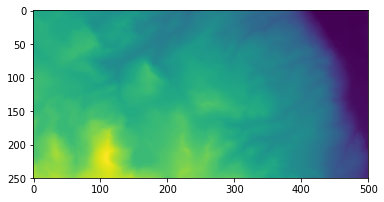

In [93]:
# northern half
matplotlib.pyplot.imshow(topo[:len(topo)/2,:])

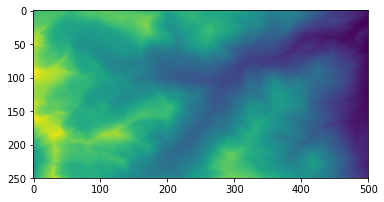

In [97]:
# southern half
matplotlib.pyplot.imshow(topo[len(topo)/2:,:])

#challenge

We can get the elevation of the centerpoint of the array <code>topo</code> using these indices: <code>topo[len(topo)/2,len(topo)/2]</code>. The function <code>len()</code> gives the length of the longest axis of the array, so this wouldn’t work if the array were not square (if it had a different number of rows and columns).

- Take a (small) slice of the array <code>topo</code> and assign it to a new variable called <code>t</code>. The height of the new array <code>t</code> should be greater than the width and both the height and the width should be even numbers (6 x 4 is a good size).

- Use indexing to extract the value of the centerpoint of the new array <code>t</code>. Write the indices using variables, not numbers (ie. don’t write <code>t[3,2]</code>) 

Hint: The method <code>topo.shape</code> gives the number of rows and columns in <code>topo</code>. Knowing this, get the shape of <code>t</code> and assign it to a variable. Use indexing on that variable to get the number of rows (index 0) and the number of columns (index 1) in <code>t</code>.

#solution

In [107]:
t = topo[:6,:4]

height_width = t.shape
print 'Shape of t:', height_width

num_rows = height_width[0]
num_cols = height_width[1]

print 'Value at centerpoint:', t[num_rows/2, num_cols/2], 'meters'

Shape of t: (6, 4)
Value at centerpoint: 3194.9573 meters


- Make a rough sketch of array <code>t</code>. Identify the cell that you identified as the centerpoint using <code>t.shape</code>. Are you *really* pointing to the center of your array? How far off is it?

#solution

!!!!!!!!! insert figs/table6x4.pdf here

The centerpoint of an array with an even number of rows and columns should fall at the intersection of four cells. Using half the height and width as indices places us half a cell off.